In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
distance = 10
height_diff = 0
stroke =200
frequency=3
axis = "x"
lambda_val = 10

In [4]:
# step 1a, load signal model new way
import signal_model_utilities_v2 as sm2

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
t,f = sm2.force_vs_time(x_sep=distance,height_sep=height_diff,stroke=stroke,frequency=frequency,axis=axis,lambda_val=lambda_val,offset_y=0,yuk_or_grav="yuk",alpha=1,bead_size=7.6)
t3,f3 = sm2.force_vs_time(x_sep=distance+3.8,height_sep=height_diff,stroke=stroke,frequency=frequency,axis=axis,lambda_val=lambda_val,offset_y=0,yuk_or_grav="yuk",alpha=1,bead_size=7.6)


Loading Gravity Data... Done!
[  1.00000000e-03   9.26118728e-04   8.57695899e-04   7.94328235e-04
   7.35642254e-04   6.81292069e-04   6.30957344e-04   5.84341413e-04
   5.41169527e-04   5.01187234e-04   4.64158883e-04   4.29866235e-04
   3.98107171e-04   3.68694506e-04   3.41454887e-04   3.16227766e-04
   2.92864456e-04   2.71227258e-04   2.51188643e-04   2.32630507e-04
   2.15443469e-04   1.99526231e-04   1.84784980e-04   1.71132830e-04
   1.58489319e-04   1.46779927e-04   1.35935639e-04   1.25892541e-04
   1.16591440e-04   1.07977516e-04   1.00000000e-04   9.26118728e-05
   8.57695899e-05   7.94328235e-05   7.35642254e-05   6.81292069e-05
   6.30957344e-05   5.84341413e-05   5.41169527e-05   5.01187234e-05
   4.64158883e-05   4.29866235e-05   3.98107171e-05   3.68694506e-05
   3.41454887e-05   3.16227766e-05   2.92864456e-05   2.71227258e-05
   2.51188643e-05   2.32630507e-05   2.15443469e-05   1.99526231e-05
   1.84784980e-05   1.71132830e-05   1.58489319e-05   1.46779927e-05
   1

In [11]:
# step 1b, load signal model old way
import signal_model_utilities as sm
t2,f2 = sm.force_vs_time(separation=distance*1e-6,height=height_diff*1e-6,stroke=stroke*1e-6,frequency=frequency,direction=axis,lambda_par=lambda_val*1e-6,offset_y=0,yuk_or_grav="yuk",alpha=1,bead_size=3.8e-6)


Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.0e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.00e-05 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.00e-05 is selected
A height of 8.47e-21 is selected


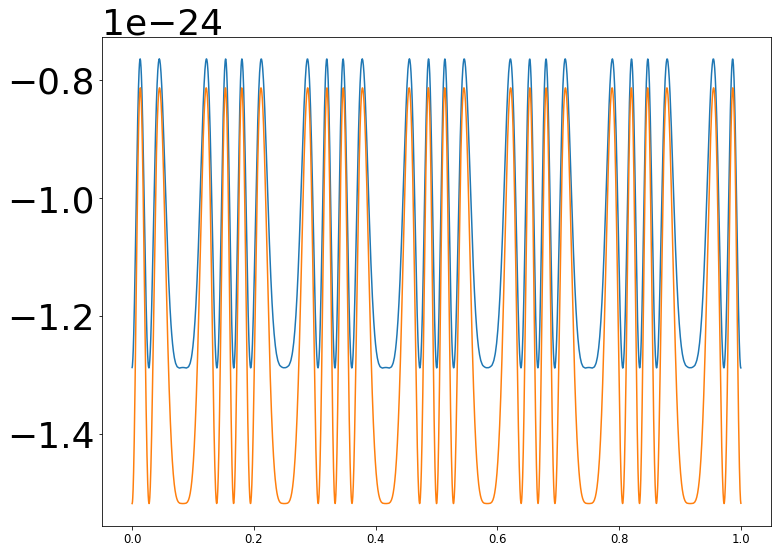

In [13]:
plt.plot(t3,f3)
plt.plot(t2,f2)

In [7]:
# step 2, generate noise spectrum
def fft_norm(N, fsamp):
    return np.sqrt(2 / (N * fsamp))

length = 5000
#r = np.random.normal(0.01035461316861217,0.0016133366256926133,length)
r=np.random.normal(0,1,length)
fft = np.abs(np.fft.rfft(r))
freq3 = np.fft.rfftfreq(length, d=1./5000)
ns = fft*fft.conj().real*fft_norm(length,5000)**2
ps_scaled = np.sqrt(ns)/np.mean(np.sqrt(ns))*1e-17

1e-17
5.26593744173e-18
2.501e-14


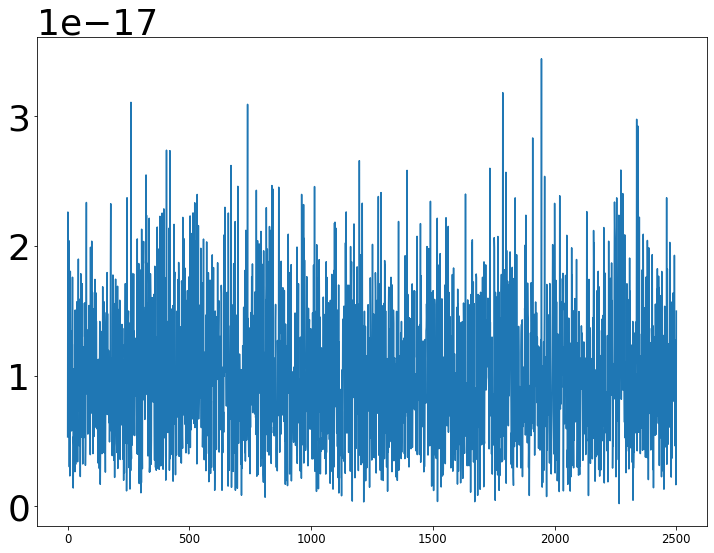

In [8]:
plt.plot(ps_scaled)
print(np.mean(ps_scaled))
print(np.std(ps_scaled))
print(np.sum(ps_scaled))

In [144]:
# step 3 calculate a limit
ps_scaled[17]

1.9842691808992718e-17

In [134]:
# step 4 compare with Nadav's result